<a href="https://colab.research.google.com/github/d-chacon/Ciencia_Datos_Taller_1/blob/main/taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller 1 (EDA)**

MINE-4101: Ciencia de Datos Aplicada
Univerisdad de los Andes

## **Objetivo**

El objetivo de este taller es evaluar las capacidades del estudiante para realizar análisis de datos utilizando técnicas estadísticas y de visualización, que le permitan entender un conjunto de datos, descubrir insights y sugerir accionables al negocio.

## **Contexto de negocio**
Inversiones inmobiliarias para alquiler vacacional. Se busca conocer los mejores sectores de la ciudad, tipos de propiedades, y otros factores que logren una rentabilidad a lo largo del tiempo, con el fin de invertir en dichas propiedades

## **1. Selección del dataset de trabajo**
La ciudad elegida es Toronto, Canadá [[dataset](http://data.insideairbnb.com/canada/on/toronto/2023-07-05/data/listings.csv.gz) | [diccionario de datos](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)].
El dataset contiene información de propiedades publicadas en Airbnb en Toronto. Incluye su descripción, barrio, ubicación en términos de latitud y longitud (WGS84) tipo de propiedad, precios y otra información relacionada con el host y reviews etc.

## **2. Entendimiento inicial de Datos**

Primero se importan las librerías necesarias, en este caso Pandas y Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

Se carga el dataset, es importante destacar que debe estar agregado en el ambiente de Colab.


In [2]:
listings_df = pd.read_csv("listings.csv.gz")

Se realiza una primera aproximación a los datos

El dataset cuenta con 25018 filas y 75 columnas

In [3]:
listings_df.shape

(25018, 75)

De las columnas, encontramos varios campos que no contienen información, como la descripción, resumen del barrio, cierta información del host, el barrio, aunque se cuenta con una información del barrio basado en la geolocalización, número de camas etc. varios de estas columnas no se utilizarán así que no es necesario hacer una limpieza de los datos.

Los atributos que se utilizarán para el análisis son

*   neighbourhood_cleansed: Barrio basado en la ubicación geográfica (String)
*   room_type: Tipo de propiedad (String)
*   price: Precio por noche en moneda local (float)
*   accommodates: Capacidad de personas en la propiedad
*   availability_365: Días disponibles de la propiedad en los próximos 365 días. (int)

De estos campos, será necesario modificar el campo precio, para convertirlo en un valor numérico



In [4]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25018 entries, 0 to 25017
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25018 non-null  int64  
 1   listing_url                                   25018 non-null  object 
 2   scrape_id                                     25018 non-null  int64  
 3   last_scraped                                  25018 non-null  object 
 4   source                                        25018 non-null  object 
 5   name                                          25018 non-null  object 
 6   description                                   24786 non-null  object 
 7   neighborhood_overview                         10469 non-null  object 
 8   picture_url                                   25018 non-null  object 
 9   host_id                                       25018 non-null 

In [5]:
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)
listings_df= listings_df[["id", "neighbourhood_cleansed", "room_type", "price_float", "accommodates", "availability_365"]]
listings_df

,id,neighbourhood_cleansed,room_type,price_float,accommodates,availability_365
0,456371,Woodbine Corridor,Private room,35.0,1,58
1,1419,Little Portugal,Entire home/apt,469.0,10,0
2,457588,Church-Yonge Corridor,Entire home/apt,300.0,3,365
3,8077,Waterfront Communities-The Island,Private room,99.0,2,0
4,462366,Brookhaven-Amesbury,Private room,55.0,2,88
...,...,...,...,...,...,...
25013,928338621568229350,Parkwoods-Donalda,Entire home/apt,124.0,2,364
25014,928349866753836739,Newtonbrook West,Private room,80.0,1,259
25015,928370511679925818,Wexford/Maryvale,Entire home/apt,98.0,2,365
25016,928371157408834372,Dufferin Grove,Entire home/apt,120.0,4,353


### **2.1 Análisis univariado**
Todas las propiedades son únicas.

In [6]:
print(listings_df["id"].nunique())
listings_df=listings_df.drop("id", axis=1)

25018


*   Precio:
Podemos ver que existe una propiedad sin precio, por lo que procedemos a eliminarla. Tenemos valores que van desde 12 a 98133 CAD. El valor de desviación estándar es alto, por lo que los datos están muy dispersos y lejos de la media, Además contamos con varios outliers, representados en el boxplot.

In [7]:
listings_df.loc[listings_df["price_float"]==0]

,neighbourhood_cleansed,room_type,price_float,accommodates,availability_365
9154,West Humber-Clairville,Hotel room,0.0,0,0


In [8]:
listings_df = (listings_df.loc[listings_df["price_float"]>0])

In [9]:
listings_df["price_float"].describe()

count    25017.000000
mean       189.606987
std        705.588585
min         12.000000
25%         84.000000
50%        120.000000
75%        199.000000
max      98133.000000
Name: price_float, dtype: float64

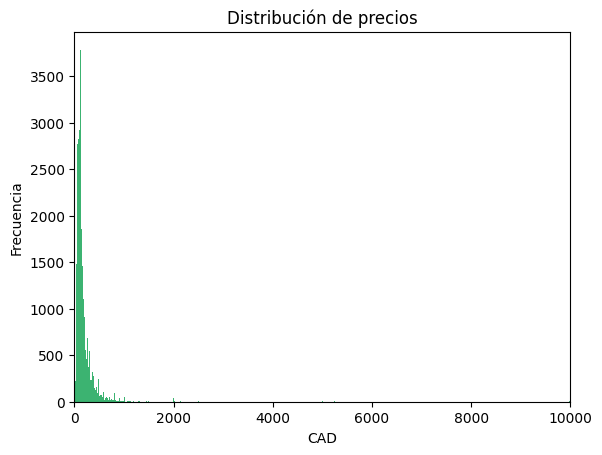

In [10]:
plt.hist(listings_df["price_float"], bins=5000, color = "mediumseagreen")
plt.title("Distribución de precios")
plt.xlabel('CAD')
plt.xlim([0, 10000])
plt.ylabel('Frecuencia')
plt.show()

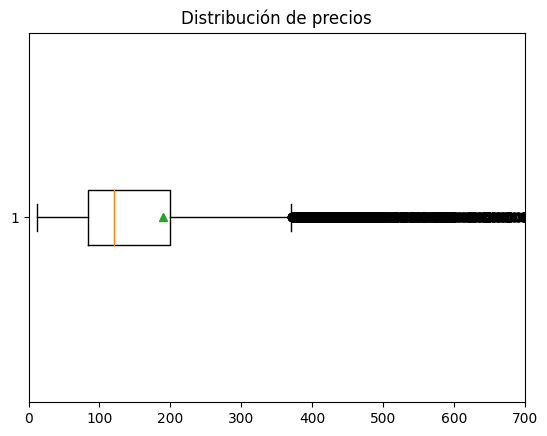

In [11]:
plt.boxplot(listings_df["price_float"], showmeans=True, vert = False)
plt.title("Distribución de precios")
plt.xlim(0, 700)
plt.show()


*   Barrio:
Se cuenta con 140 barrios para analizar. el barrio más popular es "Waterfront Communities-The Island" con 3006 propiedades, lo cual representa aproximadamente el 12%

In [12]:
listings_df["neighbourhood_cleansed"].describe()

count                                 25017
unique                                  140
top       Waterfront Communities-The Island
freq                                   3006
Name: neighbourhood_cleansed, dtype: object

In [13]:
crosstab = pd.crosstab(index = listings_df["neighbourhood_cleansed"], columns = "frecuencia absoluta", )
crosstab["frecuencia relativa"] = crosstab["frecuencia absoluta"] / listings_df["neighbourhood_cleansed"].count() *100
crosstab = crosstab.reset_index()
crosstab

col_0,neighbourhood_cleansed,frecuencia absoluta,frecuencia relativa
0,Agincourt North,38,0.151897
1,Agincourt South-Malvern West,90,0.359755
2,Alderwood,51,0.203861
3,Annex,626,2.502298
4,Banbury-Don Mills,83,0.331774
...,...,...,...
135,Wychwood,267,1.067274
136,Yonge-Eglinton,82,0.327777
137,Yonge-St.Clair,57,0.227845
138,York University Heights,166,0.663549


ElPara el eje x, el índice representa cada barrio, por comodidad en la visualización

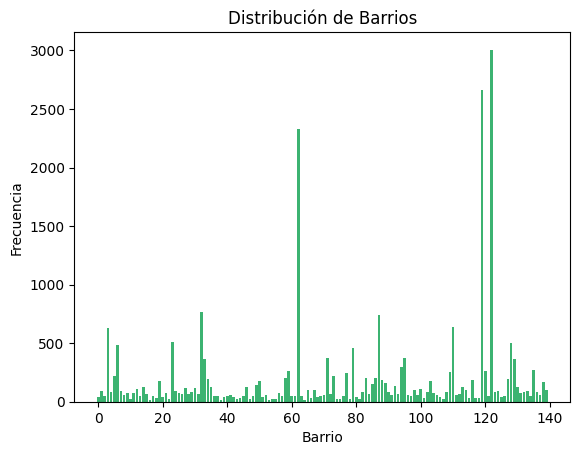

In [14]:
plt.bar(x = crosstab.index.to_list(), height = crosstab["frecuencia absoluta"], color = "mediumseagreen")
plt.title("Distribución de Barrios")
plt.xlabel('Barrio')
plt.ylabel('Frecuencia')
plt.show()

*   Tipo de propiedad:
Se cuenta con 4 tipos de propiedad, el tipo más listado es "entire home/apt" con 16464 entradas

In [15]:
listings_df["room_type"].describe()

count               25017
unique                  4
top       Entire home/apt
freq                16464
Name: room_type, dtype: object

In [16]:
crosstab = pd.crosstab(index = listings_df["room_type"], columns = "frecuencia absoluta", )
crosstab["frecuencia relativa"] = crosstab["frecuencia absoluta"] / listings_df["room_type"].count() *100
crosstab = crosstab.reset_index()
crosstab

col_0,room_type,frecuencia absoluta,frecuencia relativa
0,Entire home/apt,16464,65.811248
1,Hotel room,2,0.007995
2,Private room,8401,33.581165
3,Shared room,150,0.599592


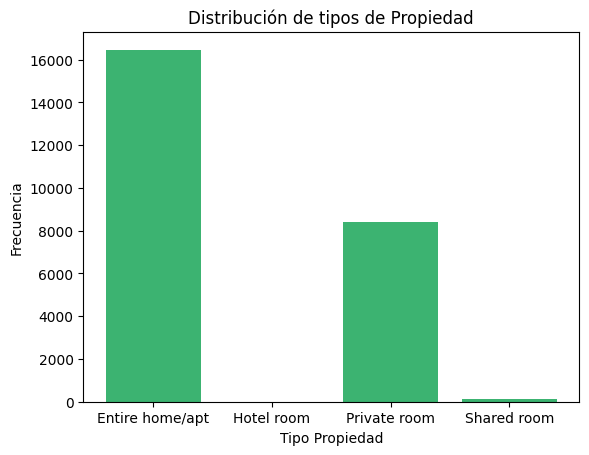

In [17]:
plt.bar(x = crosstab["room_type"], height = crosstab["frecuencia absoluta"], color = "mediumseagreen")
plt.title("Distribución de tipos de Propiedad")
plt.xlabel('Tipo Propiedad')
plt.ylabel('Frecuencia')
plt.show()

*   Capacidad:Las propiedades tienen capacidades de 1 a 16 personas, la distribución de estos datos es sesgada hacia la derecha, con capacidades de 2 a 3 personas

In [18]:
listings_df["accommodates"].describe()

count    25017.000000
mean         2.903266
std          1.893025
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

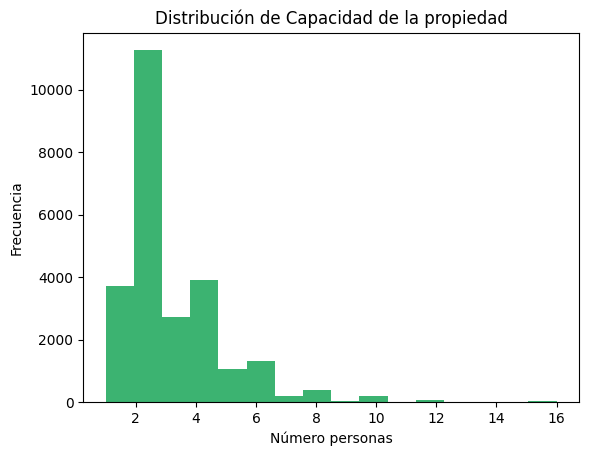

In [19]:
plt.hist(listings_df["accommodates"], bins=16, color = "mediumseagreen")
plt.title("Distribución de Capacidad de la propiedad")
plt.xlabel('Número personas')
plt.ylabel('Frecuencia')
plt.show()

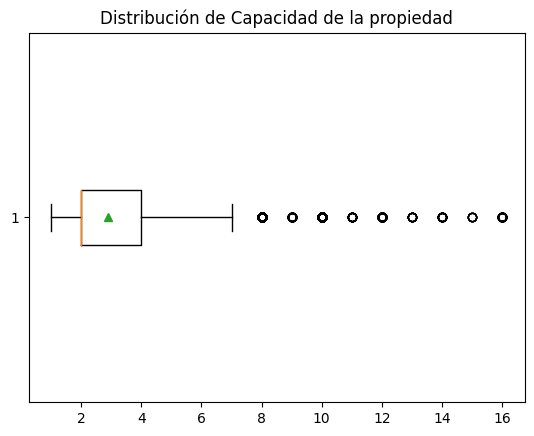

In [20]:
plt.boxplot(listings_df["accommodates"], showmeans=True, vert = False)
plt.title("Distribución de Capacidad de la propiedad")
plt.show()

*  Disponibilidad 365: Se tiene en promedio una disponibilidad de 195 días al año por propiedad con rangos que varían desde 0 hasta 365, según lo observado por el boxplot, no contamos con outliers ya que el rango va hasta el número máximo de días por año

In [21]:
listings_df["availability_365"].describe()

count    25017.000000
mean       195.338090
std        141.571101
min          0.000000
25%         48.000000
50%        217.000000
75%        336.000000
max        365.000000
Name: availability_365, dtype: float64

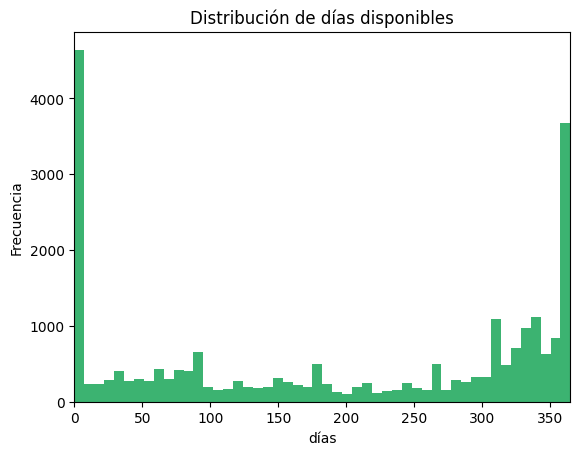

In [22]:
plt.hist(listings_df["availability_365"], bins=50, color = "mediumseagreen")
plt.title("Distribución de días disponibles")
plt.xlabel('días')
plt.xlim([0, 365])
plt.ylabel('Frecuencia')
plt.show()

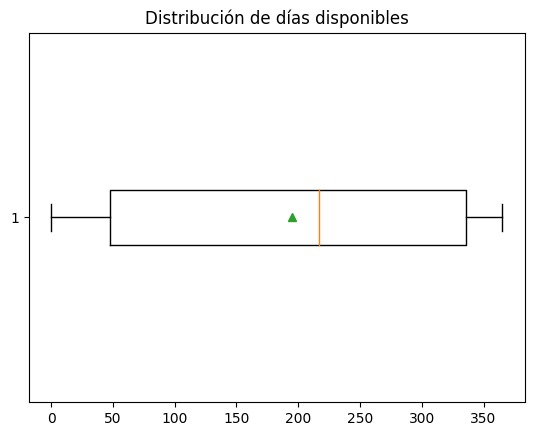

In [23]:
plt.boxplot(listings_df["availability_365"], showmeans=True, vert = False)
plt.title("Distribución de días disponibles")
plt.show()

## **3.  Estrategia de análisis:**

En primer lugar, procederemos a encontrar la correlación entre las variables cuantitativas para encontrar una posible relación directa o inversa entre estas y la cantidad de días disponibles. Se busca encontrar una relación para aquellas propiedades que tengan una disponibilidad cercana a cero en los prócimos 365 días.

Para las variables categóricas, se utilizará un EDA multivariado gráfico, con ayuda de mapas de calor, matrices de correlación y trataremos de averiguar que categorías influyen más en una baja disponibilidad de la propiedad, ya que una baja disponibilidad a largo plazo asegura rentabilidad por la ocupación.

## **4. Desarrollo de la estrategia**

In [24]:
print("correlación con precio " + str(listings_df["availability_365"].corr(listings_df["price_float"])))
print("correlación con capacidad de personas " + str(listings_df["availability_365"].corr(listings_df["accommodates"])))

correlación con precio -0.010574388800627164
correlación con capacidad de personas -0.08978122956889664


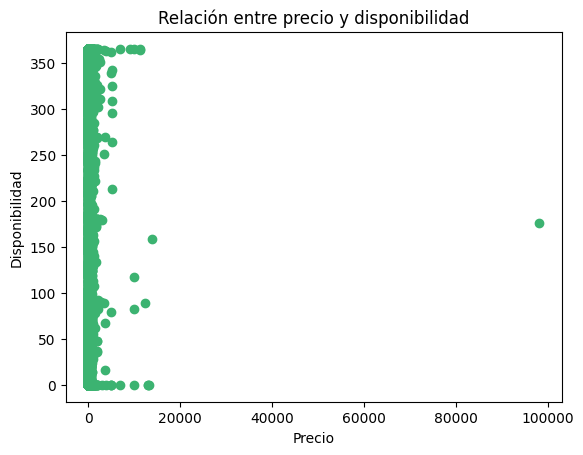

In [25]:
plt.scatter(x = listings_df["price_float"],y = listings_df["availability_365"], color="mediumseagreen")
plt.title("Relación entre precio y disponibilidad")
plt.ylabel("Disponibilidad")
plt.xlabel("Precio")
plt.show()

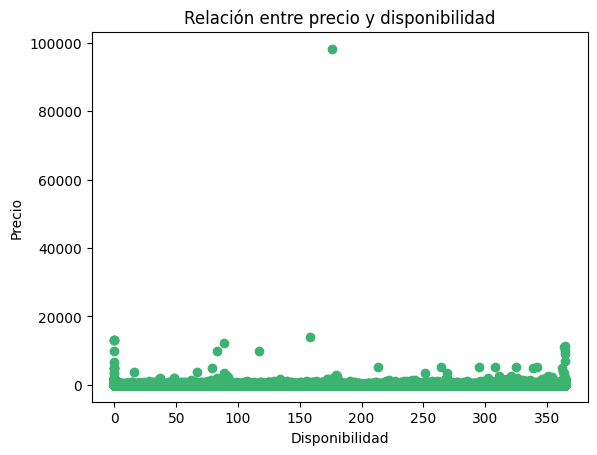

In [26]:
plt.scatter(x = listings_df["availability_365"],y = listings_df["price_float"], color="mediumseagreen")
plt.title("Relación entre precio y disponibilidad")
plt.xlabel("Disponibilidad")
plt.ylabel("Precio")
plt.show()

Como podemos ver gracias al coeficiente de correlación y los scatterplots, estas variables son independientes.

In [27]:
matriz_correlacion = listings_df.groupby(["neighbourhood_cleansed", "price_float"]).size()
matriz_correlacion = matriz_correlacion.reset_index(name="conteo")
matriz_correlacion = matriz_correlacion.pivot(index = "neighbourhood_cleansed", columns = "price_float", values = "conteo")
matriz_correlacion

price_float,12.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,275.0,276.0,277.0,278.0,279.0,280.0,281.0,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,416.0,417.0,418.0,419.0,420.0,421.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,506.0,507.0,508.0,509.0,510.0,511.0,513.0,514.0,515.0,516.0,517.0,518.0,519.0,520.0,522.0,523.0,525.0,526.0,527.0,528.0,529.0,530.0,532.0,533.0,534.0,535.0,536.0,537.0,538.0,539.0,540.0,541.0,542.0,543.0,545.0,546.0,547.0,548.0,549.0,550.0,552.0,553.0,554.0,555.0,556.0,557.0,558.0,559.0,560.0,562.0,563.0,564.0,566.0,568.0,570.0,571.0,573.0,574.0,575.0,576.0,577.0,578.0,579.0,580.0,581.0,582.0,583.0,584.0,585.0,586.0,588.0,589.0,590.0,591.0,592.0,594.0,595.0,596.0,597.0,598.0,599.0,600.0,602.0,603.0,604.0,606.0,608.0,610.0,611.0,613.0,614.0,615.0,617.0,620.0,621.0,622.0,623.0,625.0,626.0,628.0,629.0,630.0,631.0,633.0,634.0,635.0,636.0,638.0,640.0,642.0,643.0,644.0,645.0,646.0,647.0,648.0,649.0,650.0,651.0,655.0,656.0,657.0,659.0,661.0,662.0,663.0,664.0,665.0,666.0,668.0,669.0,670.0,671.0,674.0,676.0,677.0,679.0,680.0,682.0,685.0,686.0,689.0,690.0,691.0,692.0,696.0,698.0,699.0,700.0,702.0,703.0,704.0,705.0,707.0,709.0,710.0,711.0,713.0,714.0,718.0,719.0,720.0,722.0,725.0,726.0,729.0,730.0,731.0,735.0,736.0,738.0,740.0,741.0,742.0,743.0,746.0,748.0,749.0,750.0,755.0,756.0,760.0,763.0,764.0,765.0,766.0,768.0,770.0,7

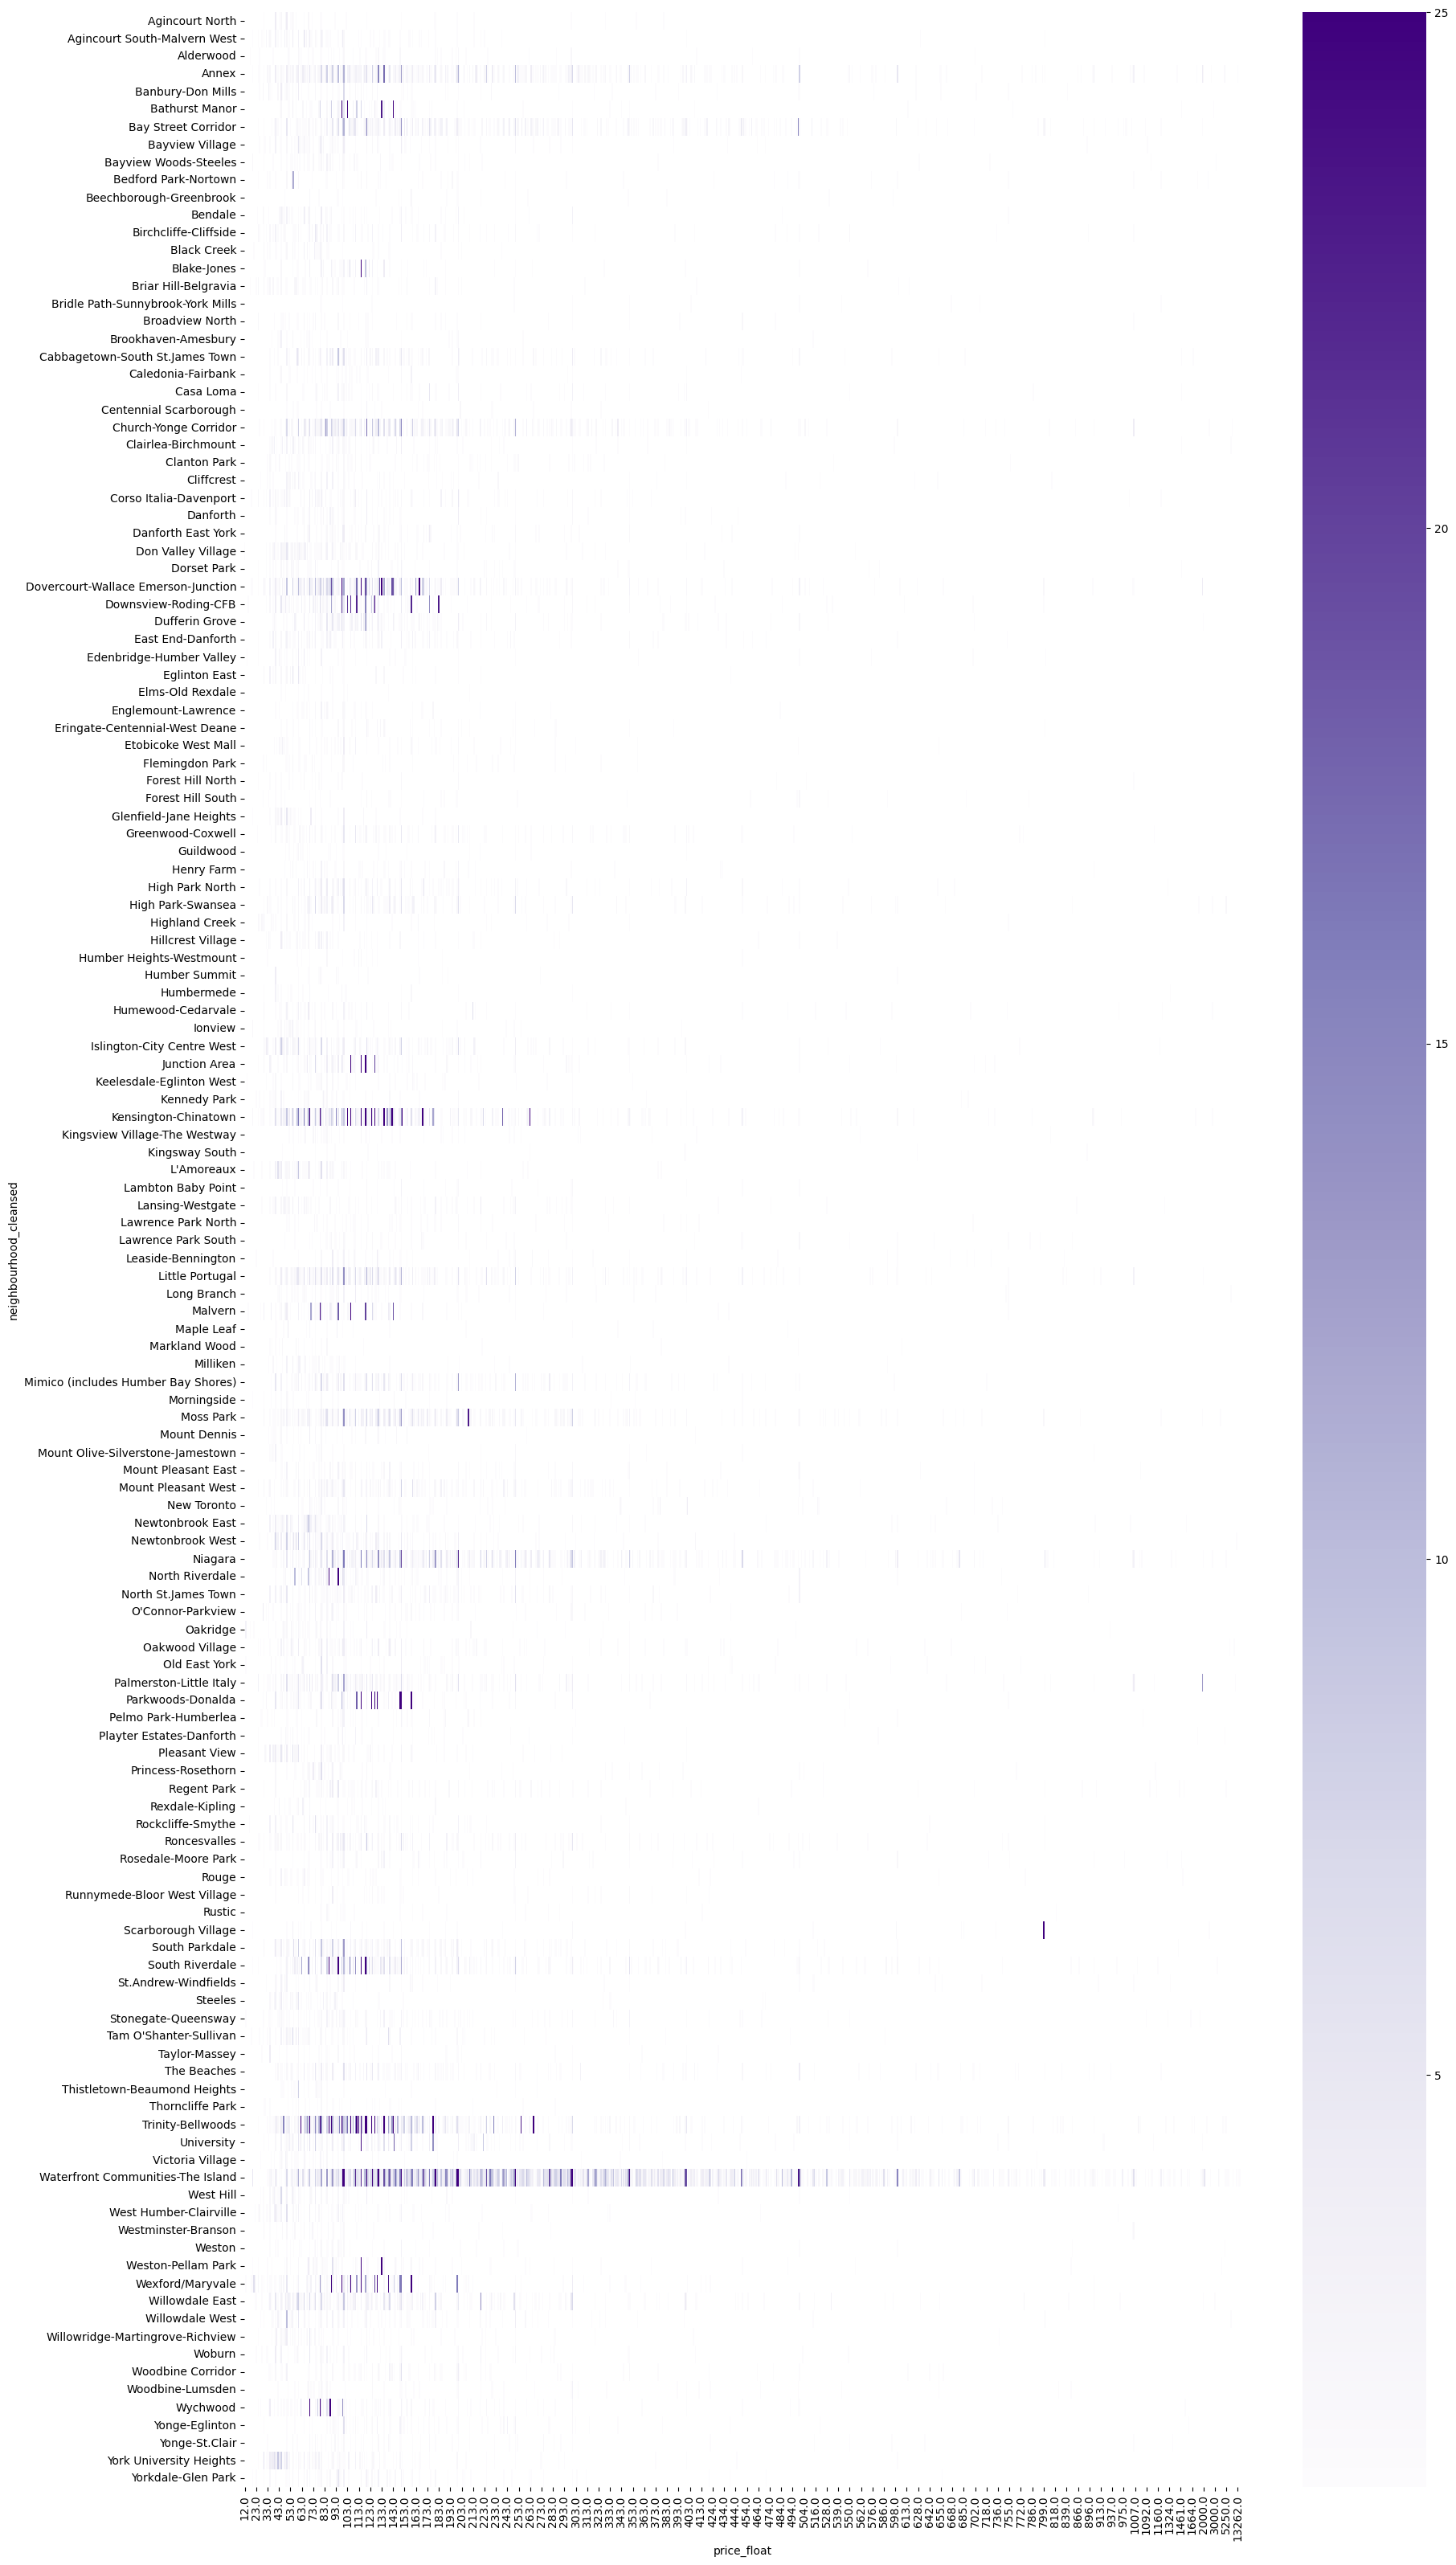

In [28]:
plt.figure(figsize=(20, 40))
sns.heatmap(matriz_correlacion, cmap="Purples", vmin = 1, vmax =25)
plt.show()

In [29]:
matriz_correlacion = listings_df.groupby([listings_df['availability_365'], "room_type"]).size()
matriz_correlacion = matriz_correlacion.reset_index(name="conteo")
matriz_correlacion = matriz_correlacion.pivot(index = "availability_365", columns = "room_type", values = "conteo")
matriz_correlacion

room_type,Entire home/apt,Hotel room,Private room,Shared room
availability_365,,,,
0,2781.0,1.0,1467.0,56.0
1,58.0,NaN,32.0,NaN
2,26.0,NaN,12.0,NaN
3,24.0,NaN,19.0,NaN
4,32.0,NaN,12.0,NaN
...,...,...,...,...
361,153.0,NaN,95.0,NaN
362,186.0,NaN,47.0,NaN
363,231.0,NaN,147.0,NaN


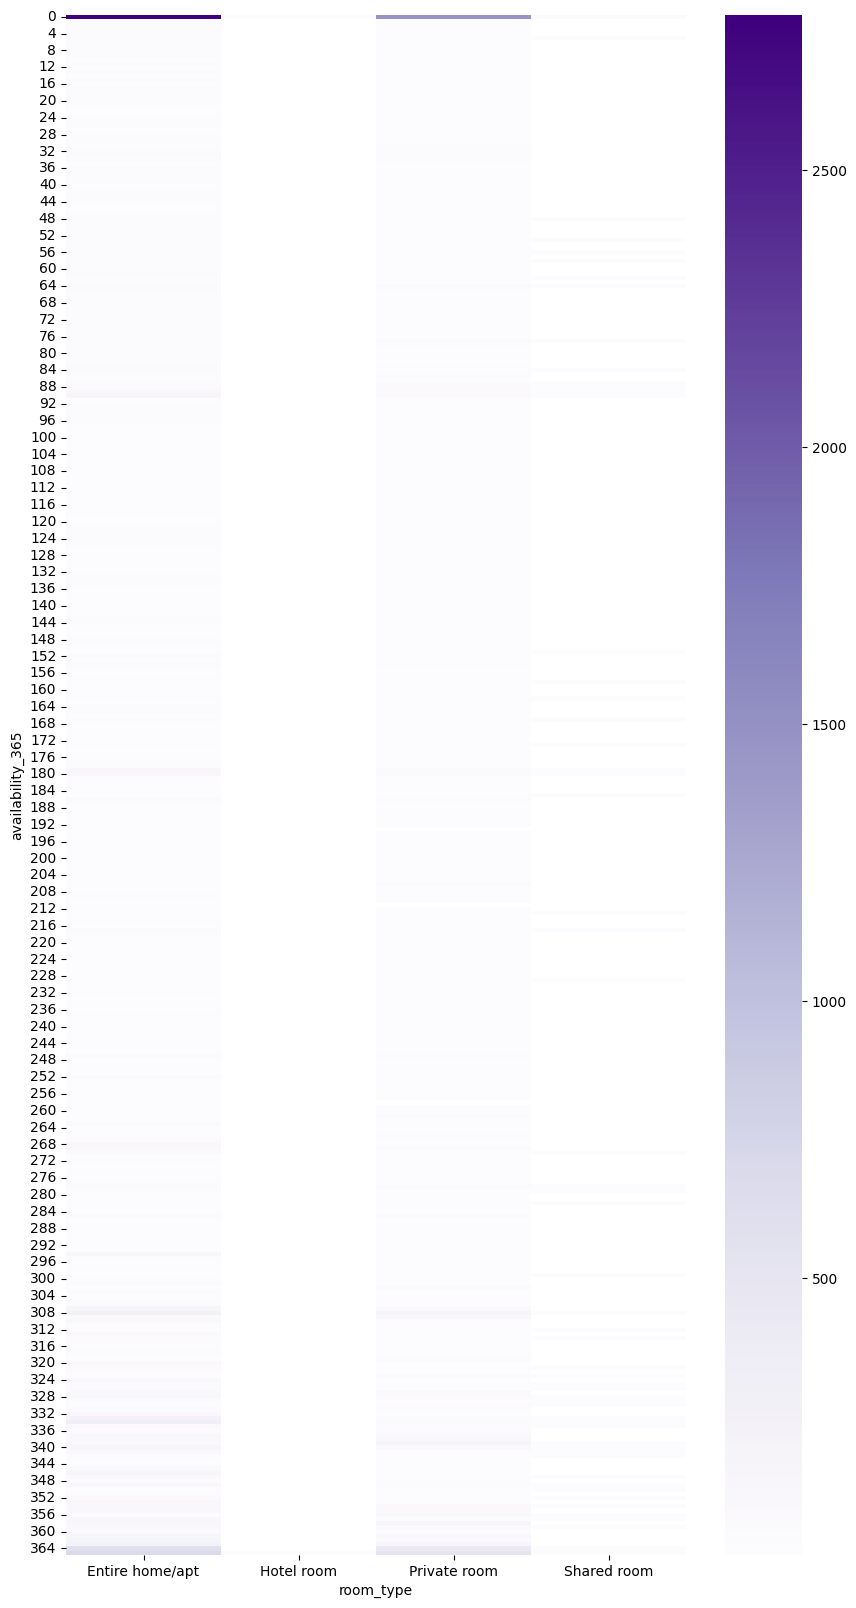

In [30]:
plt.figure(figsize=(10, 20))
sns.heatmap(matriz_correlacion, cmap="Purples")
plt.show()

In [31]:
matriz_correlacion = listings_df.groupby([listings_df['availability_365'],listings_df['accommodates']]).size()
matriz_correlacion = matriz_correlacion.reset_index(name="conteo")
matriz_correlacion = matriz_correlacion.pivot(index = "availability_365", columns = "accommodates", values = "conteo")
matriz_correlacion.describe()

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,349.000000,366.000000,346.000000,364.000000,290.000000,321.000000,122.000000,203.000000,32.00000,104.000000,13.000000,63.000000,7.000000,13.000000,5.0,28.000000
mean,10.690544,30.762295,7.835260,10.700549,3.689655,4.115265,1.680328,1.985222,1.28125,2.028846,1.076923,1.317460,1.142857,1.307692,1.0,1.535714
std,43.263845,104.691410,27.123636,42.233327,12.953479,14.024614,3.394859,4.719328,0.92403,4.266502,0.277350,0.964288,0.377964,0.854850,0.0,1.231745
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
25%,2.000000,8.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
50%,4.000000,13.000000,3.000000,6.000000,2.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
75%,6.000000,20.000000,5.000000,9.000000,3.000000,4.000000,2.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.000000
max,675.000000,1830.000000,453.000000,749.000000,205.000000,242.000000,38.000000,65.000000,6.00000,30.000000,2.000000,7.000000,2.000000,4.000000,1.0,7.000000


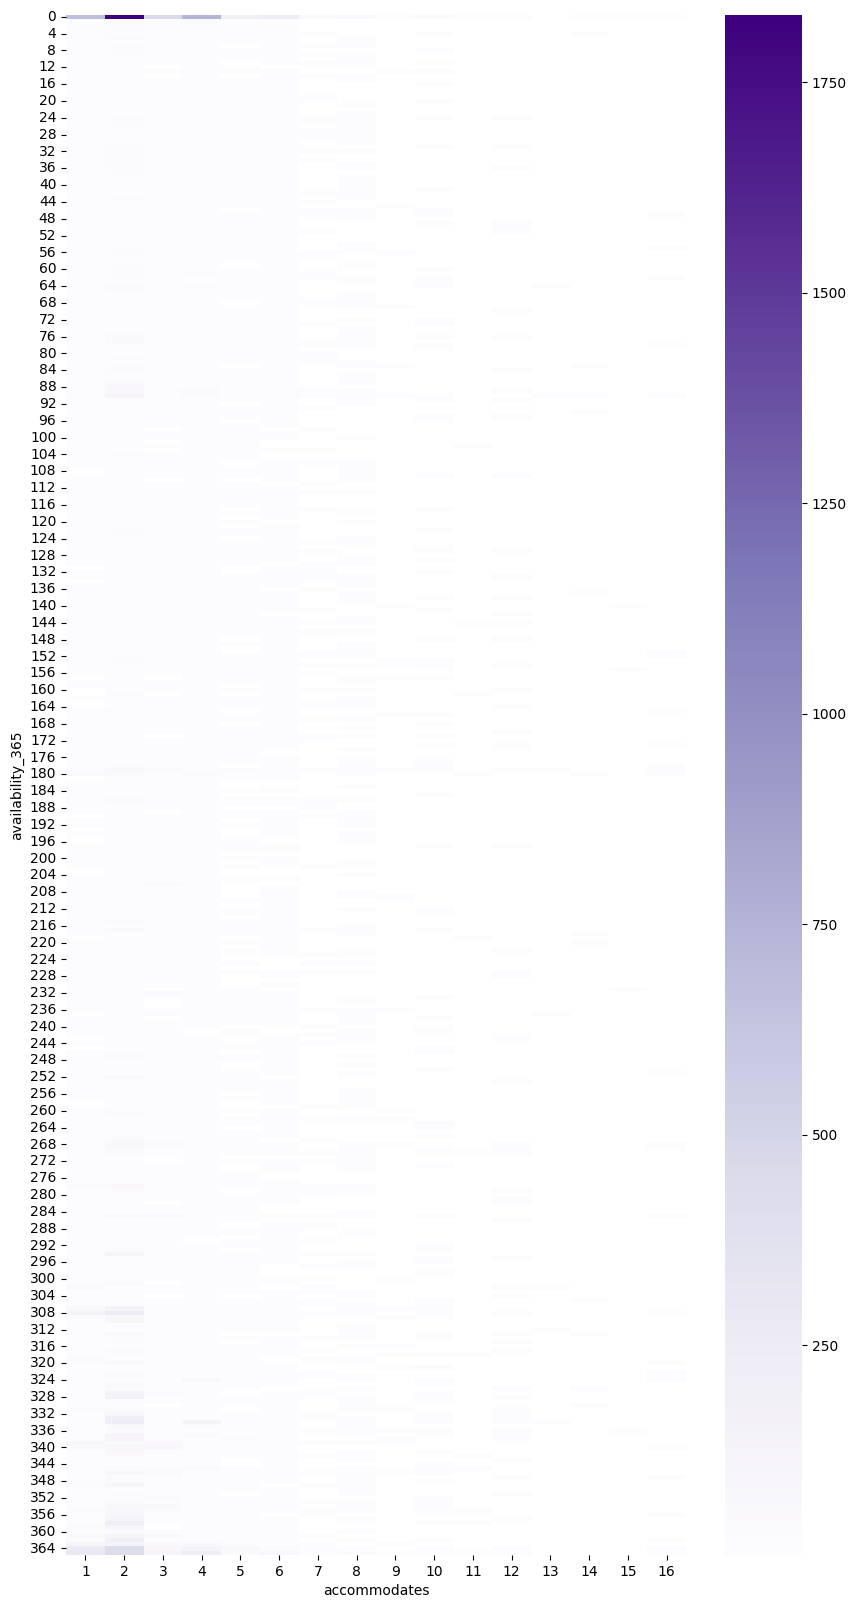

In [32]:
plt.figure(figsize=(10  , 20))
sns.heatmap(matriz_correlacion, cmap="Purples")
plt.show()

In [33]:
matriz_correlacion = listings_df.groupby([pd.cut(listings_df['availability_365'],50),listings_df['neighbourhood_cleansed']]).size()
matriz_correlacion = matriz_correlacion.reset_index(name="conteo")
matriz_correlacion = matriz_correlacion.pivot(index = "neighbourhood_cleansed", columns = "availability_365", values = "conteo")
matriz_correlacion

availability_365,"(-0.365, 7.3]","(7.3, 14.6]","(14.6, 21.9]","(21.9, 29.2]","(29.2, 36.5]","(36.5, 43.8]","(43.8, 51.1]","(51.1, 58.4]","(58.4, 65.7]","(65.7, 73.0]","(73.0, 80.3]","(80.3, 87.6]","(87.6, 94.9]","(94.9, 102.2]","(102.2, 109.5]","(109.5, 116.8]","(116.8, 124.1]","(124.1, 131.4]","(131.4, 138.7]","(138.7, 146.0]","(146.0, 153.3]","(153.3, 160.6]","(160.6, 167.9]","(167.9, 175.2]","(175.2, 182.5]","(182.5, 189.8]","(189.8, 197.1]","(197.1, 204.4]","(204.4, 211.7]","(211.7, 219.0]","(219.0, 226.3]","(226.3, 233.6]","(233.6, 240.9]","(240.9, 248.2]","(248.2, 255.5]","(255.5, 262.8]","(262.8, 270.1]","(270.1, 277.4]","(277.4, 284.7]","(284.7, 292.0]","(292.0, 299.3]","(299.3, 306.6]","(306.6, 313.9]","(313.9, 321.2]","(321.2, 328.5]","(328.5, 335.8]","(335.8, 343.1]","(343.1, 350.4]","(350.4, 357.7]","(357.7, 365.0]"
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agincourt North,14,0,0,0,1,1,1,1,1,1,0,0,4,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,1
Agincourt South-Malvern West,32,0,1,0,0,0,0,2,1,2,1,0,2,0,1,1,0,3,0,0,2,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,2,5,1,6,2,2,1,17
Alderwood,12,4,1,0,1,0,2,0,1,0,2,0,1,1,0,3,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,3,1,1,0,0,1,1,0,0,1,0,0,2,3,0,0,3
Annex,166,11,5,13,17,16,10,13,12,16,19,6,28,4,6,4,5,4,4,8,9,3,3,5,29,9,3,8,8,10,4,4,5,10,8,1,6,5,10,8,4,5,16,9,6,5,13,7,6,40
Banbury-Don Mills,15,1,0,2,0,0,1,2,1,0,1,0,5,0,0,0,1,1,1,1,0,1,1,0,2,2,0,0,0,0,0,0,1,1,0,0,2,1,4,1,1,2,7,1,1,3,5,0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,26,2,0,1,3,1,1,1,1,0,2,1,3,0,2,3,1,1,2,1,2,1,1,2,2,0,0,0,1,2,2,2,1,2,1,0,0,1,4,1,1,5,5,1,0,1,3,1,7,166
Yonge-Eglinton,25,0,2,0,2,2,2,0,3,1,2,1,1,1,1,2,3,0,1,0,0,0,1,0,0,1,4,4,1,0,1,1,1,9,0,0,0,0,2,0,0,0,2,1,0,1,0,0,0,4
Yonge-St.Clair,23,0,1,0,0,0,2,0,0,0,0,2,1,1,1,0,2,1,0,0,1,0,1,0,3,1,2,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,2,3,0,0,1,1,0,3


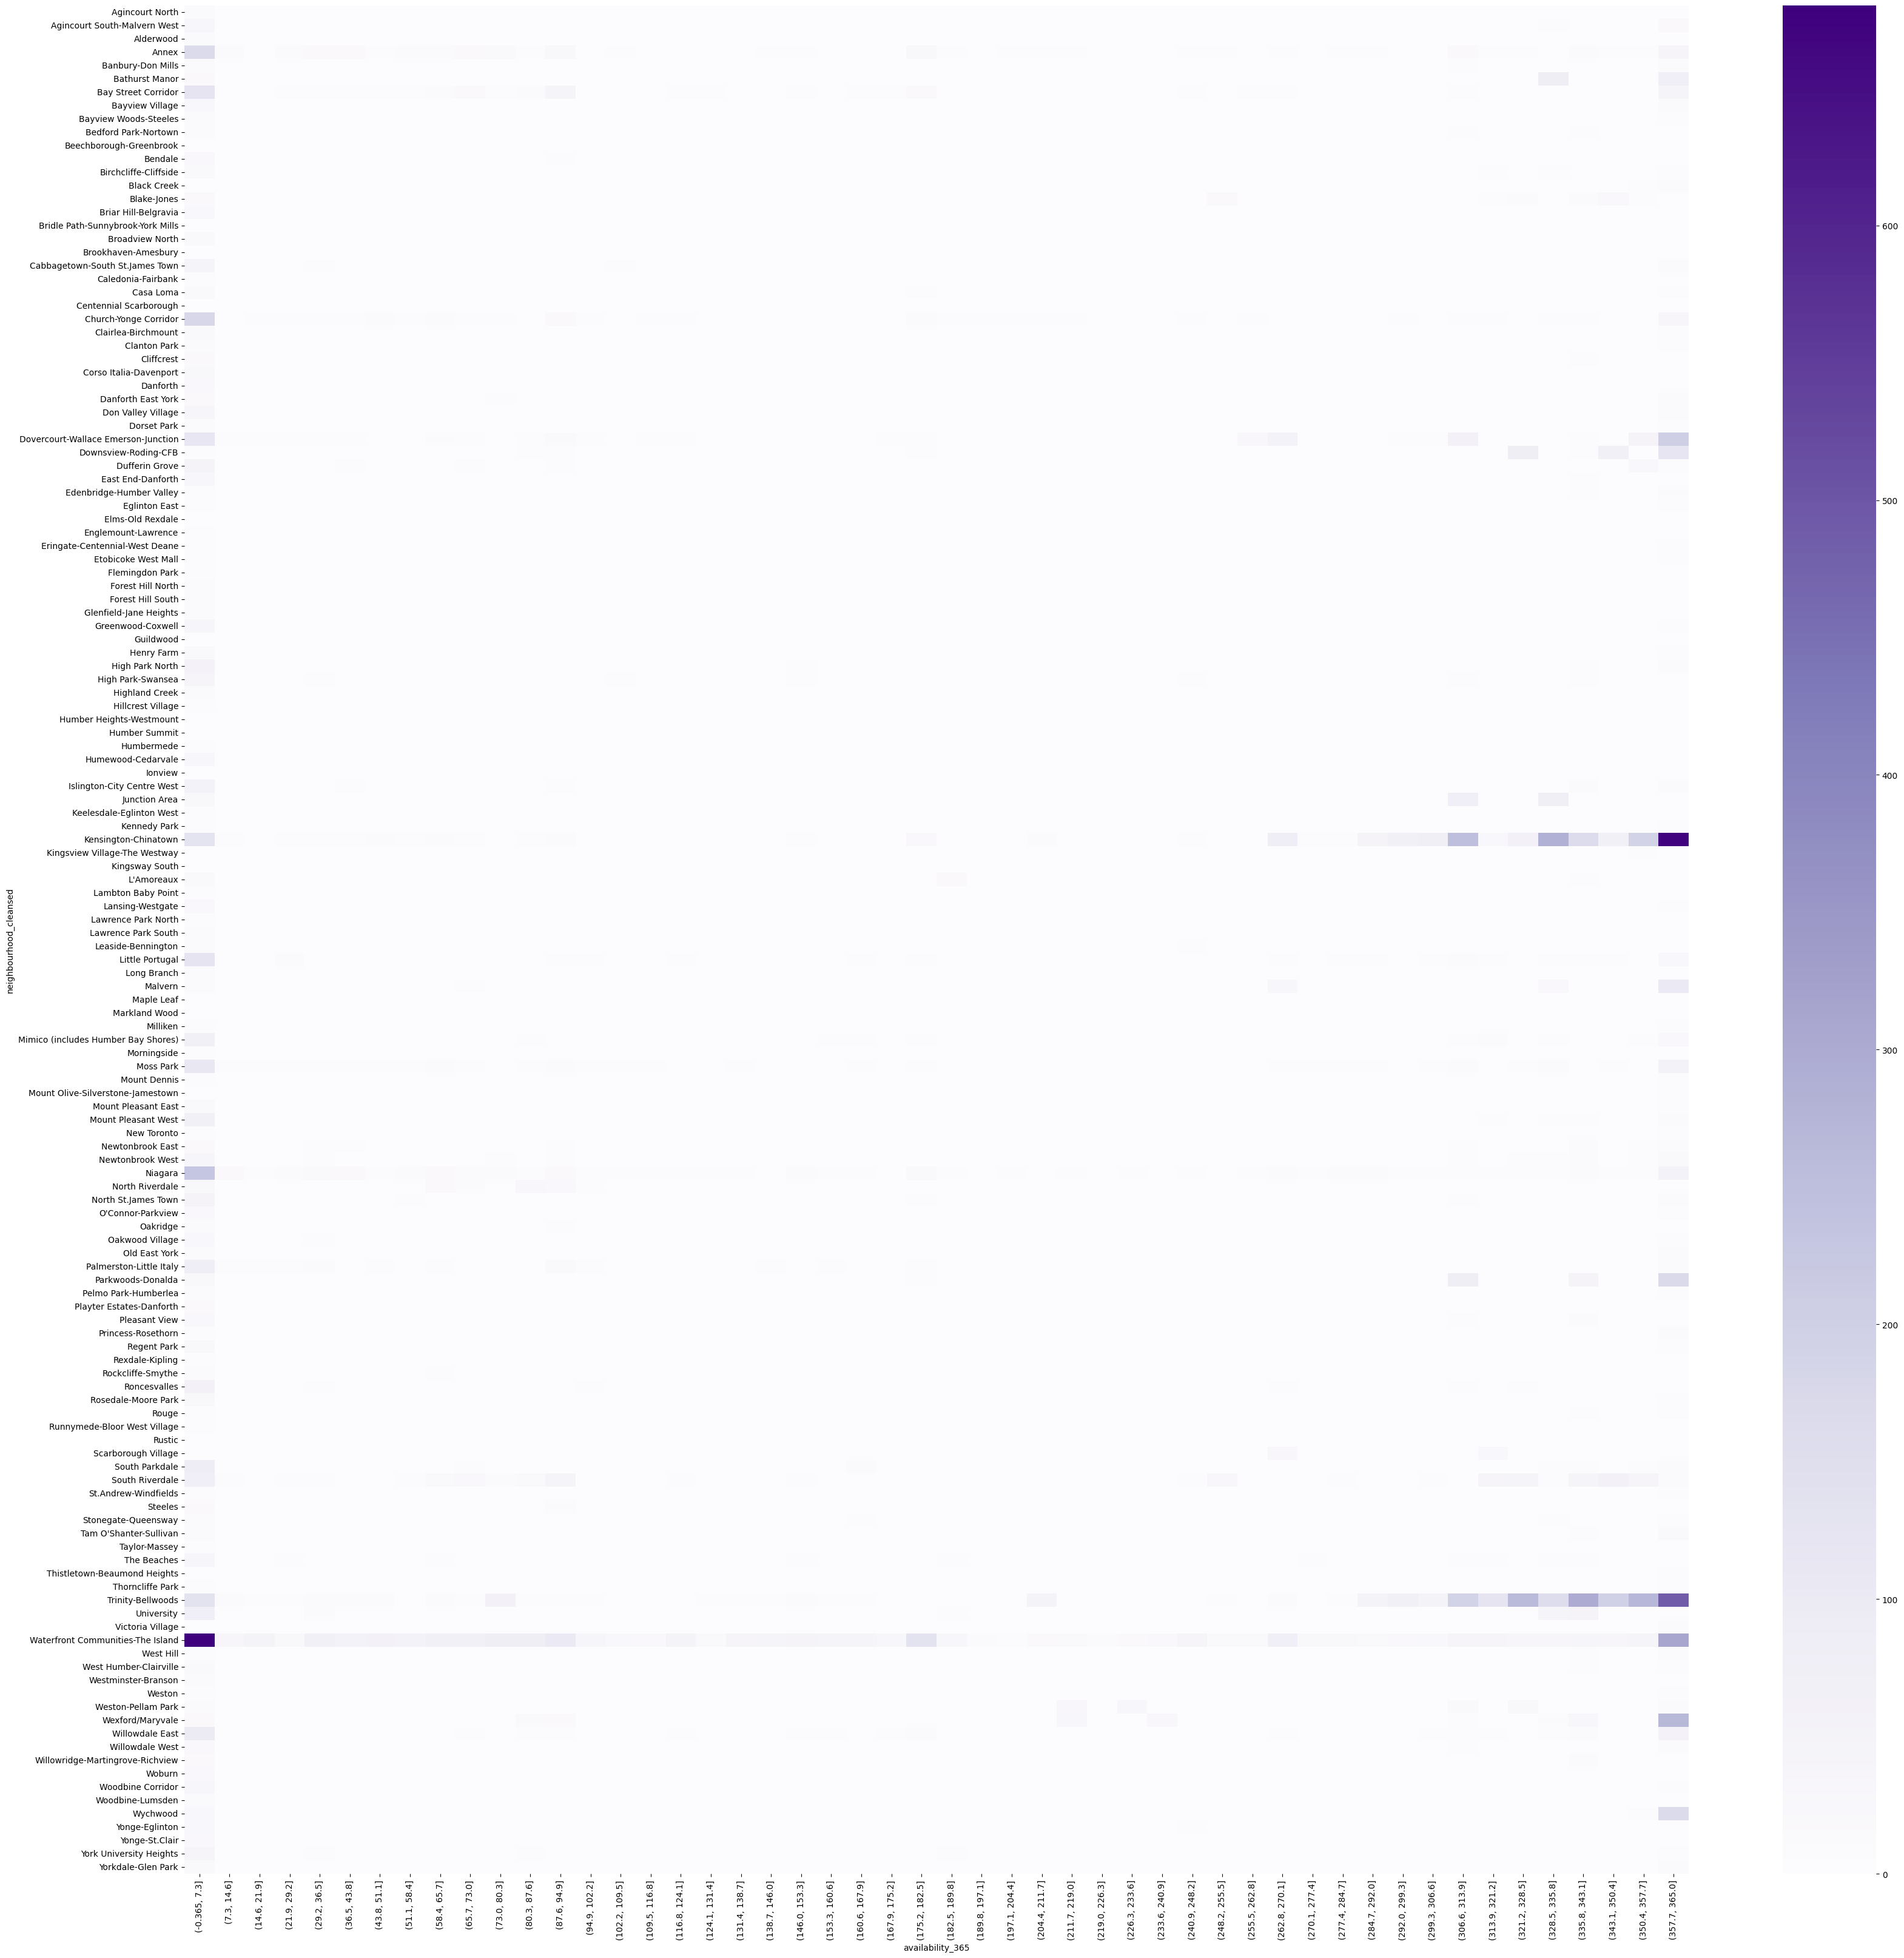

In [34]:
plt.figure(figsize=(40, 40))
sns.heatmap(matriz_correlacion, cmap="Purples")
plt.show()

In [35]:
matriz_correlacion = listings_df.groupby(['availability_365','price_float']).size()
matriz_correlacion = matriz_correlacion.reset_index(name="conteo")
matriz_correlacion = matriz_correlacion.pivot(index = "availability_365", columns = "price_float", values = "conteo")
matriz_correlacion

price_float,12.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,275.0,276.0,277.0,278.0,279.0,280.0,281.0,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,416.0,417.0,418.0,419.0,420.0,421.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,506.0,507.0,508.0,509.0,510.0,511.0,513.0,514.0,515.0,516.0,517.0,518.0,519.0,520.0,522.0,523.0,525.0,526.0,527.0,528.0,529.0,530.0,532.0,533.0,534.0,535.0,536.0,537.0,538.0,539.0,540.0,541.0,542.0,543.0,545.0,546.0,547.0,548.0,549.0,550.0,552.0,553.0,554.0,555.0,556.0,557.0,558.0,559.0,560.0,562.0,563.0,564.0,566.0,568.0,570.0,571.0,573.0,574.0,575.0,576.0,577.0,578.0,579.0,580.0,581.0,582.0,583.0,584.0,585.0,586.0,588.0,589.0,590.0,591.0,592.0,594.0,595.0,596.0,597.0,598.0,599.0,600.0,602.0,603.0,604.0,606.0,608.0,610.0,611.0,613.0,614.0,615.0,617.0,620.0,621.0,622.0,623.0,625.0,626.0,628.0,629.0,630.0,631.0,633.0,634.0,635.0,636.0,638.0,640.0,642.0,643.0,644.0,645.0,646.0,647.0,648.0,649.0,650.0,651.0,655.0,656.0,657.0,659.0,661.0,662.0,663.0,664.0,665.0,666.0,668.0,669.0,670.0,671.0,674.0,676.0,677.0,679.0,680.0,682.0,685.0,686.0,689.0,690.0,691.0,692.0,696.0,698.0,699.0,700.0,702.0,703.0,704.0,705.0,707.0,709.0,710.0,711.0,713.0,714.0,718.0,719.0,720.0,722.0,725.0,726.0,729.0,730.0,731.0,735.0,736.0,738.0,740.0,741.0,742.0,743.0,746.0,748.0,749.0,750.0,755.0,756.0,760.0,763.0,764.0,765.0,766.0,768.0,770.0,7

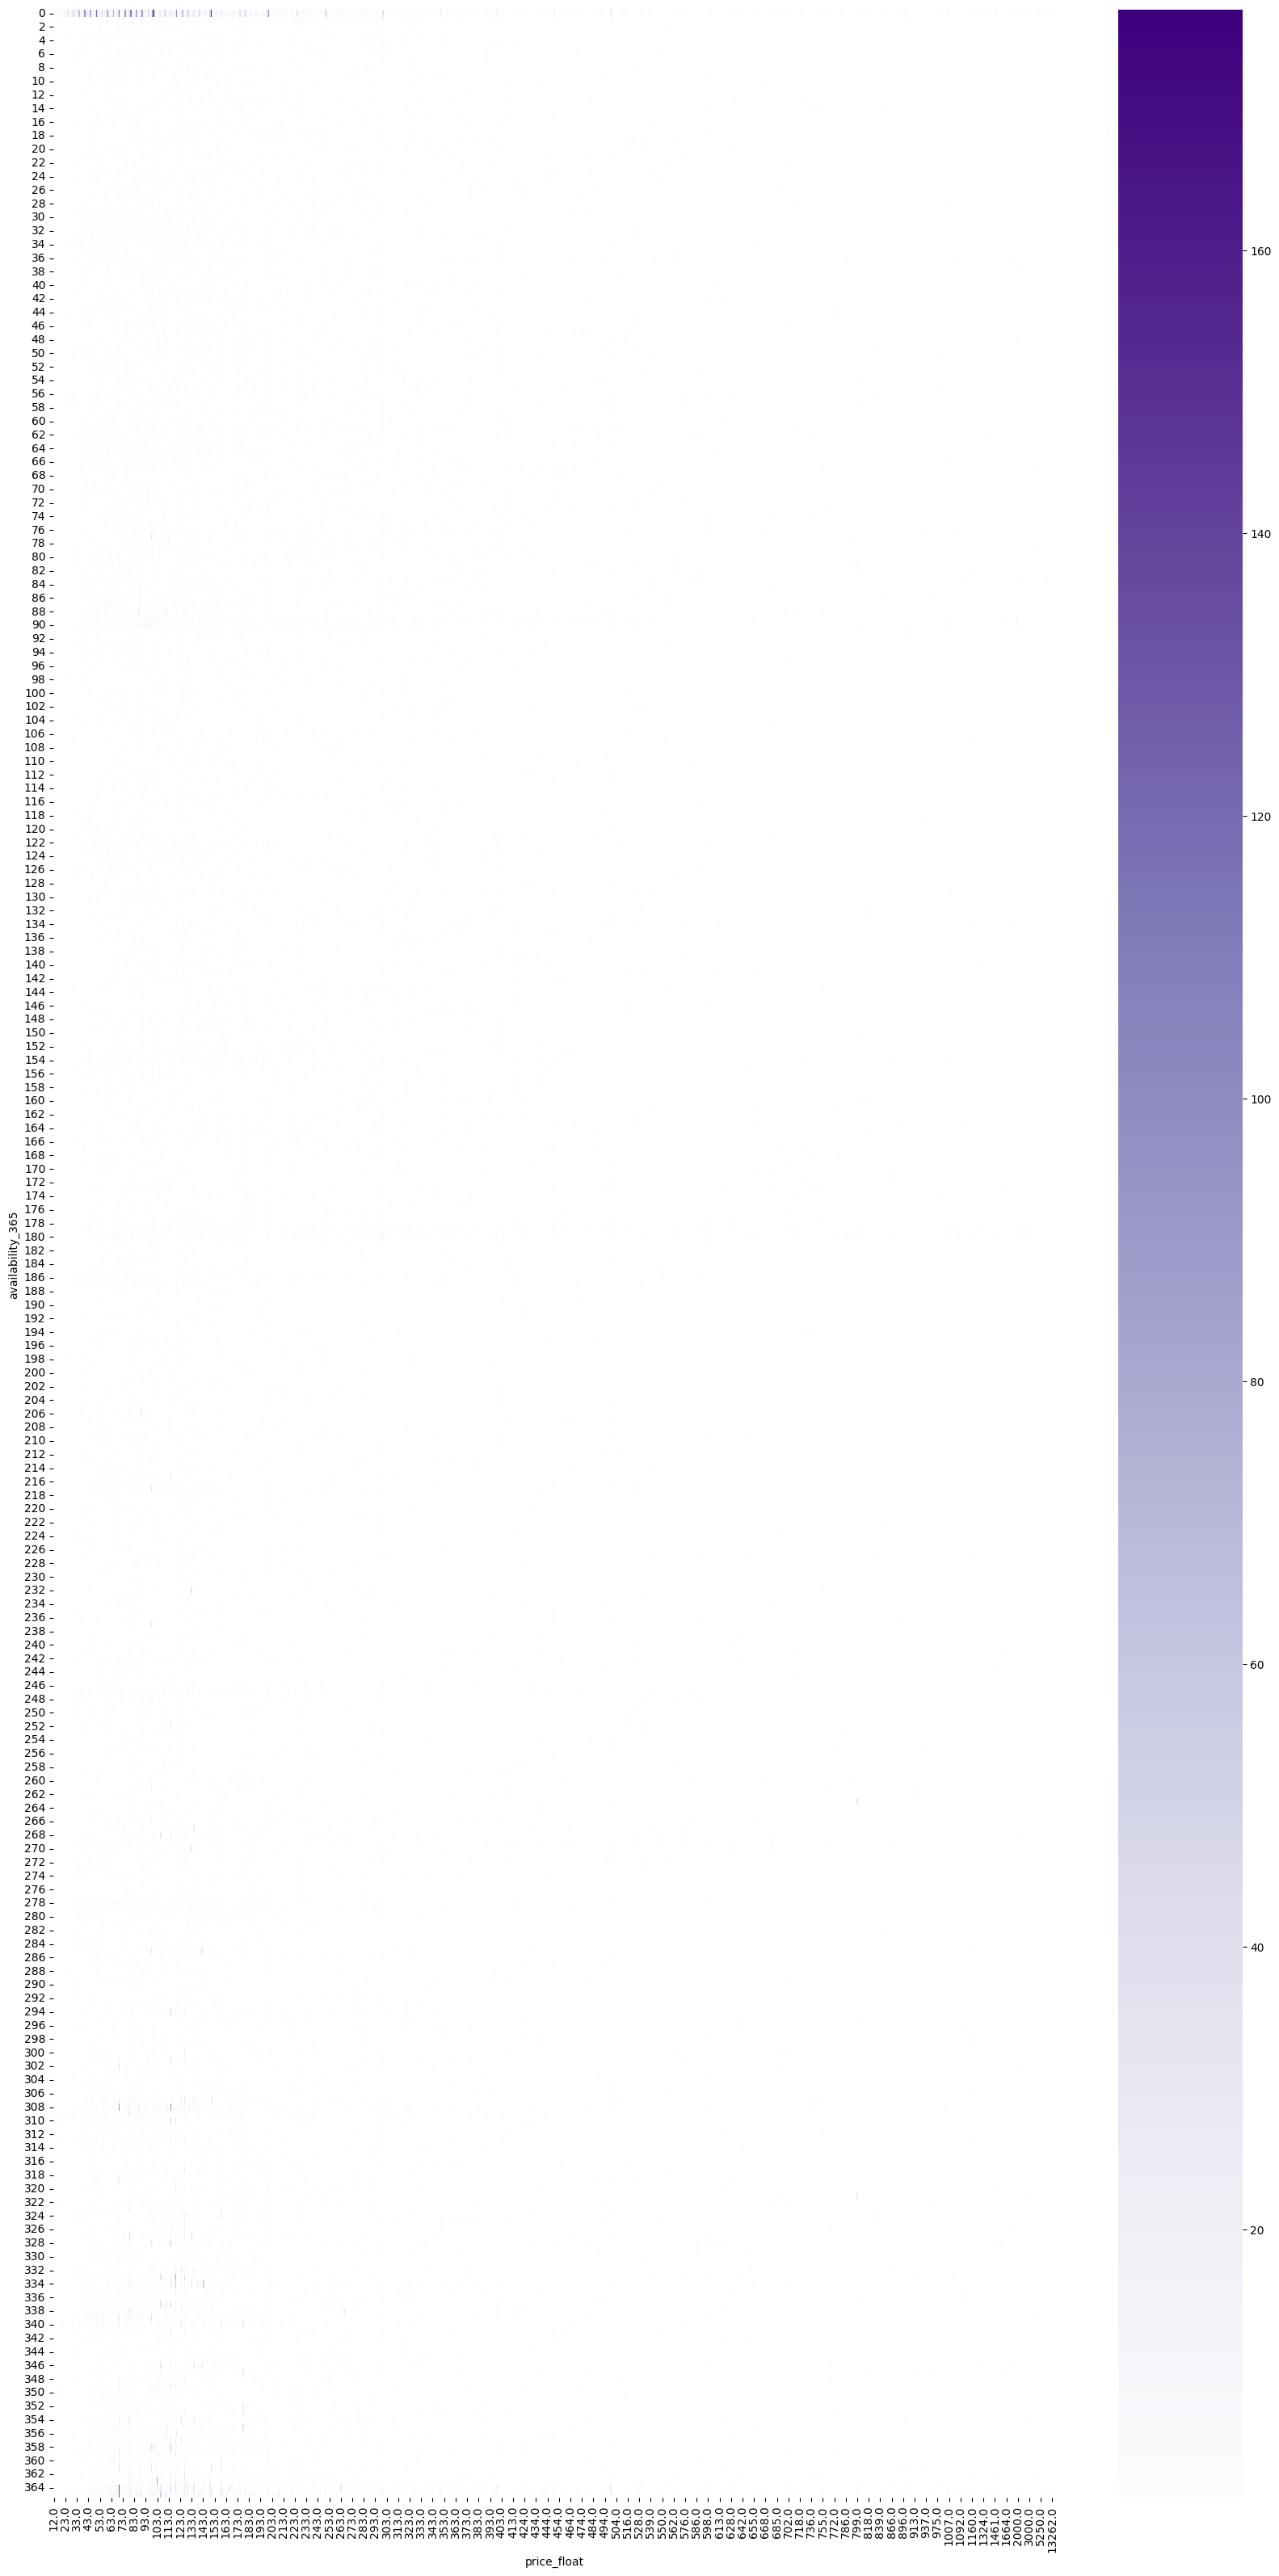

In [36]:
plt.figure(figsize=(20, 40))
sns.heatmap(matriz_correlacion, cmap="Purples")
plt.show()

## **5: Generación de resultados:**

Con ese análisis podemos encontrar varios insights:
*   Los tipos de propiedad que menos disponibilidad tienen a futuro son las habitaciones privadas y una propiedad completa
*   Las propiedades con menos disponibilidad tienen como capacidad de 1 a 4 personas.
*   Los barrios con menos disponibilidad a futuro tienen un rango de precios de 12 a 160 CAD.
*   Los barrios con más casas de precios hasta 160 dólares son: Annex, Wychwood, Wexford/Maryvale, Waterfornt Communities-The Island, Trinity-Bellwoods, South Riverdale. Kensington-Chinatown, Dovercourt-Wallace Emerson-Junction
* Los barrios con menos disponibilidad a futuro son: Annex, Bay Street Corridor, Church/Yonge Corridor, Dovercourt-Wallace Emerson-Juncton, Kensington-Chinatown,Little Portugal Moss Park, Trinity-Bellwoods, Waterfront Communities-The Island

Para lograr una propiedad que tenga un alquiler con poca disponibilidad (que se rente mucho por lo cual casi siempre esté rentado) se recomiendan los barrios Wychwood, Wexford/Maryvale, Waterfornt Communities-The Island, Trinity-Bellwoods, South Riverdale. Kensington-Chinatown, Dovercourt-Wallace Emerson-Junction, por su precio.

Además, si se quiere asegurar la rentabilidad aún mas, es preferible invertir en una propiedad en un barrio que se rente con frecuencia en Airbnb, con un precio que sea atractivo para los guests dados los datos. Los barrios serían: Annex, Waterfront Communities-The Island, Dovercourt-Wallace Emerson-Juncton, Kensington-Chinatown y Trinity-Bellwoods además, asegurar que sea para 1 a 4 personas, ya que grupos más grandes no garantizan una rentabilidad y alquiler constante.